In [2]:
import  torch
import math
from zuko.utils import broadcast
from pathlib import Path
import h5py


def load_data(file: Path, window: int = None):
    '''
    The window argument prepared the pseudo markov blanket
    used for approxiamting the score. However I think there is something
    strange going on here. Or I am just confused.

    NOTE: If we condier a specific window size, shouldn't we be
    symmetric. So I have the feeling that data = data.unfold(1, window, 1)
    should be data = data.unfold(1, 2*window+1, 1). But in this case it's not the case.

    NOTE (2): windows should be an odd number only, otherwise it is not running. Or at least
                this is what is happening in the lorenz experiment. So k = window // 2

    '''
    with h5py.File(file, mode='r') as f:
        data = f['x'][:]

    data = torch.from_numpy(data)

    if window is None:
        pass
    elif window == 1:
        data = data.flatten(0, 1)
    else:
        data = data.unfold(1, window, 1)
        data = data.movedim(-1, 2)
        data = data.flatten(2, 3)
        data = data.flatten(0, 1)

    return data


/Users/iuliadiaconu/miniconda3/envs/sda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
DATA_PATH = Path('../sda_data/Kolmogorov dataset')
window = 5
trainset = load_data(DATA_PATH / 'train.h5', window=window)
print(trainset.shape)

torch.Size([49140, 10, 64, 64])


In [58]:
t = torch.rand(x.shape[0], dtype=x.dtype, device=x.device)
t.shape

torch.Size([9])

In [64]:
epoch_size = 64 # should be 4096
batch_size = 32
i = torch.randint(len(trainset), (epoch_size,))
subset = trainset[i]

for x in subset.split(batch_size):
    t = torch.rand(x.shape[0], dtype=x.dtype)
    print(t.shape)

torch.Size([32])
torch.Size([32])


torch.Size([9, 2, 64, 64])
torch.Size([9, 64, 64])


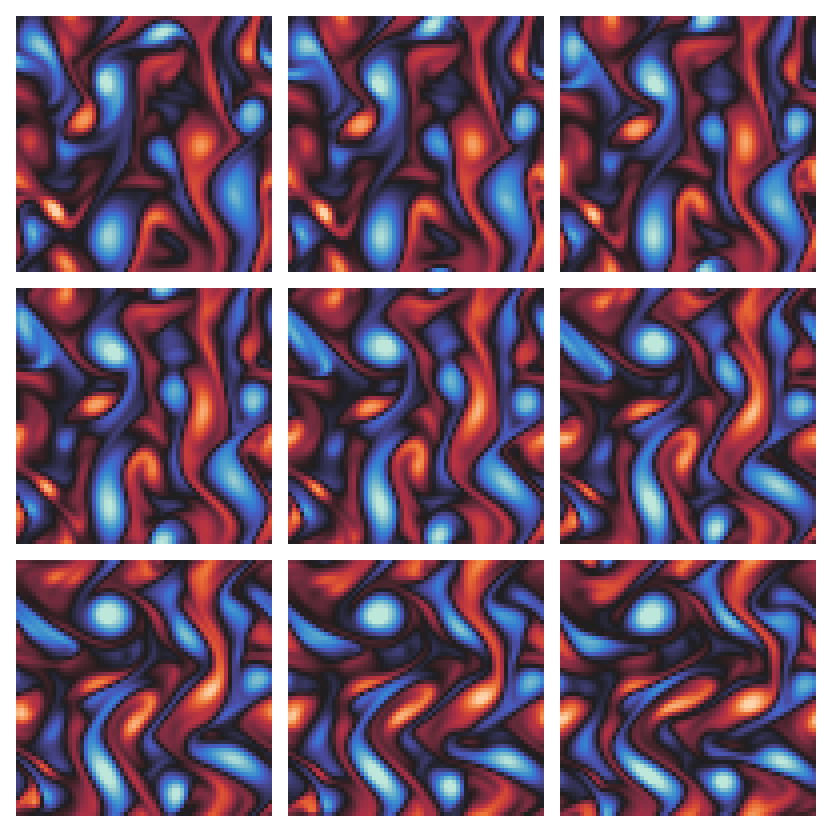

In [44]:
from experiments.kolmogorov.utils import *

chain = make_chain()

x = trainset[0:9, 0:2]
#x = torch.from_numpy(x)
#x = chain.coarsen(x[:9], 4)
print(x.shape)
w = chain.vorticity(x)
print(w.shape)

draw(w.reshape(3, 3, 64, 64), zoom=4)

In [19]:
*batch, _, h, w = x.shape

y = x.reshape(-1, 2, h, w)
y = torch.nn.functional.pad(y, pad=(1, 1, 1, 1), mode='circular')

du, = torch.gradient(y[:, 0], dim=-1)
dv, = torch.gradient(y[:, 1], dim=-2)

y = du - dv
y = y[:, 1:-1, 1:-1]
y = y.reshape(*batch, h, w)

64

In [ ]:
# window = 3
# [50778, 2*3, 64, 64]

# window = 5
# [49140, 2*5, 64, 64]